In [ ]:
%cd /content/drive/MyDrive/ML/Project1/Pneumonia
%ls

/content/drive/.shortcut-targets-by-id/166/Pneumonia
chest_xray/  __MACOSX/  test/  train/  valid/


In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input,Dropout,MaxPooling2D
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2, 
                                   vertical_flip = True)

training_set = train_datagen.flow_from_directory(directory =  'train',
                                                 batch_size = 8,
                                                 target_size = (150, 150),
                                                 class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(directory =  'test',
                                                 batch_size = 8,
                                                 target_size = (150, 150),
                                                 class_mode = 'binary')

valid_datagen = ImageDataGenerator(rescale = 1./255)

valid_set = valid_datagen.flow_from_directory(directory =  'valid',
                                                 batch_size = 8,
                                                 target_size = (150, 150),
                                                 class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model=Sequential([
        Input(shape=(150,150,3)),
        Conv2D(32,3,activation='relu'),
        MaxPool2D(pool_size=2),
        Conv2D(32,3,activation='relu'),
        MaxPool2D(pool_size=3),
        Dropout(0.2),
        Flatten(),
        Dense(256,activation='linear'),
        Dense(1,activation='sigmoid')        
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(training_set, validation_data=valid_set, batch_size=10, epochs=30)

Epoch 1/30
652/652 [==============================] - 80s 120ms/step - loss: 0.6235 - accuracy: 0.8081 - val_loss: 0.5982 - val_accuracy: 0.8750
Epoch 2/30
652/652 [==============================] - 78s 119ms/step - loss: 0.2819 - accuracy: 0.8891 - val_loss: 0.5532 - val_accuracy: 0.6875
Epoch 3/30
652/652 [==============================] - 78s 119ms/step - loss: 0.2384 - accuracy: 0.9099 - val_loss: 0.9651 - val_accuracy: 0.6250
Epoch 4/30
652/652 [==============================] - 78s 120ms/step - loss: 0.2223 - accuracy: 0.9117 - val_loss: 0.6710 - val_accuracy: 0.6875
Epoch 5/30
652/652 [==============================] - 77s 119ms/step - loss: 0.2302 - accuracy: 0.9114 - val_loss: 1.1191 - val_accuracy: 0.6250
Epoch 6/30
652/652 [==============================] - 77s 118ms/step - loss: 0.2173 - accuracy: 0.9215 - val_loss: 0.7022 - val_accuracy: 0.6875
Epoch 7/30
652/652 [==============================] - 77s 118ms/step - loss: 0.1822 - accuracy: 0.9268 - val_loss: 0.5996 - val_ac

In [ ]:
test_results = model.predict(test_set)

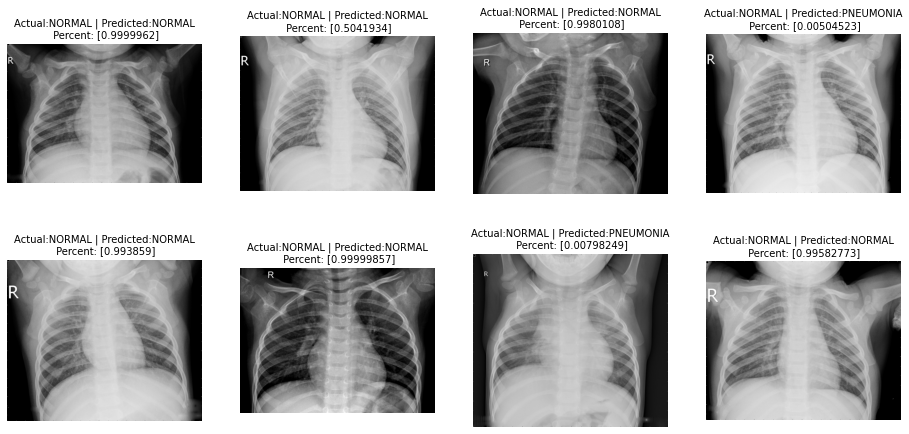

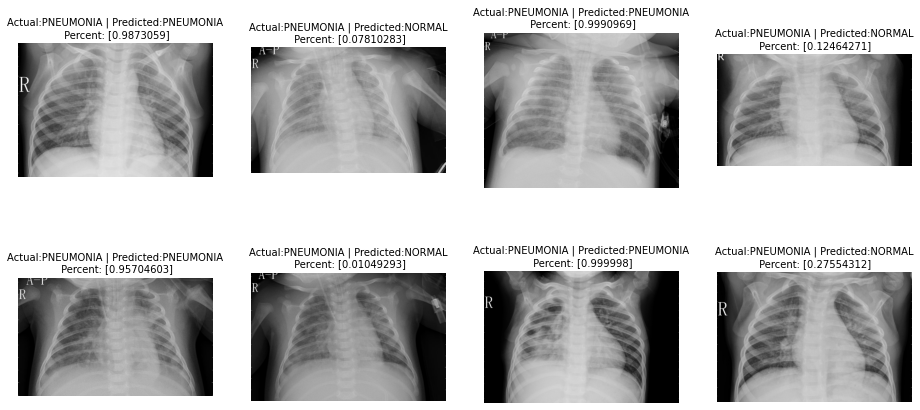

In [ ]:
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

val_normal_dir = os.path.join('valid','NORMAL')
val_pneumonia_dir = os.path.join('valid','PNEUMONIA')
val_normal_pix = [os.path.join(val_normal_dir, fname) 
                for fname in os.listdir(val_normal_dir) if fname!='.DS_Store']
val_pneumonia_pix = [os.path.join(val_pneumonia_dir, fname) 
                for fname in os.listdir(val_pneumonia_dir) if fname!='.DS_Store']

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Show images of normal lung x-rays
for i, img_path in enumerate(val_normal_pix):
    # Get predicted label and covert to normal/pneumonia
    label = test_results[i]
    if label>0.5:
        prediction = 'NORMAL'
    else:
        prediction = 'PNEUMONIA'
    
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    sp.set_title(f'Actual:NORMAL | Predicted:{prediction}\n Percent: {label}',fontsize=10)

    plt.imshow(cv2.cvtColor(mpimg.imread(img_path), cv2.COLOR_BGR2RGB))
plt.show()

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# Show images of pneumonia lung x-rays
for i, img_path in enumerate(val_pneumonia_pix):
    # Get predicted label and covert to normal/pneumonia
    label = test_results[i-8]
    if label<0.5:
        prediction = 'NORMAL'
    else:
        prediction = 'PNEUMONIA'
    
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    sp.set_title(f'Actual:PNEUMONIA | Predicted:{prediction}\n Percent: {label}' ,fontsize=10)

    plt.imshow(cv2.cvtColor(mpimg.imread(img_path), cv2.COLOR_BGR2RGB))
    
plt.show()

In [ ]:
%cd /content/drive/MyDrive/ML/Project1
%ls

/content/drive/MyDrive/ML/Project1
cnn3.ipynb  CNN.h5  cnn.ipynb  Dense.h5  Dense.ipynb  Pneumonia@


In [ ]:
model.save('CNN.h5')